In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import tqdm
import os
from PIL import Image

2023-08-01 14:21:25.075239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 14:21:25.204743: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 14:21:25.208327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-01 14:21:25.208337: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
RANDOM_SEED = 0
DATA_PATH = "../data/derived_data/items_with_floor/"
OUTPUT_PATH = "../data/derived_data/data_augmented/"

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [3]:
def random_crop(image):
    x, y = random.randint(25,125), random.randint(25,175)
    ex = random.randint(140, 200)
    return tf.image.crop_to_bounding_box(image, x, y, ex, ex)

operations = [
    tf.keras.layers.RandomRotation(0.5, interpolation="nearest", seed=None),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=None),
    random_crop,
    tf.keras.layers.RandomHeight(0.25, interpolation='nearest', seed=None),
    tf.keras.layers.RandomWidth(0.25, interpolation='nearest', seed=None),
    tf.keras.layers.RandomContrast(0.25, seed=None),
    tf.keras.layers.RandomBrightness(0.5, value_range=(50, 200), seed=None),
    lambda image: tf.image.random_hue(image, 0.25, seed=None),
    lambda image: tf.image.random_saturation(image, 0, 1, seed=None),
]

In [4]:
N_RANDOM_OPERATIONS_COMBINATIONS = 100
SAVE_IMAGE = True
IMG_SIZE = 128

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE, interpolation="nearest"),
  tf.keras.layers.Rescaling(1./255)
])

def augment_image(img_path):
    img = Image.open(img_path)
    img_arr = np.array(img)

    # without extension
    img_filename = img_path.split("/")[-1][:-4]

    for i, op in enumerate(operations):
        img_arr_augmented = op(img_arr)

        if SAVE_IMAGE:
            os.makedirs(f"{OUTPUT_PATH}/{img_filename}", exist_ok=True)
            Image.fromarray(img_arr_augmented.numpy().astype(np.uint8), "RGB").save(f"{OUTPUT_PATH}/{img_filename}/{img_filename}_{str(i)}.png")

        # img_arr_augmented = resize_and_rescale(img_arr_augmented)
        # np.save(f"{OUTPUT_PATH}/{img_filename}_{str(i)}", img_arr_augmented.numpy().astype(np.float16))

    random_ops_combs = [random.sample(operations, k=random.randint(1,len(operations))) for _ in range(N_RANDOM_OPERATIONS_COMBINATIONS)]

    for i, random_ops in enumerate(random_ops_combs, start=i+1):
        img_arr_augmented = img_arr
        for op in random_ops:
            img_arr_augmented = op(img_arr_augmented)
        
        if SAVE_IMAGE:
            os.makedirs(f"{OUTPUT_PATH}/{img_filename}", exist_ok=True)
            Image.fromarray(img_arr_augmented.numpy().astype(np.uint8), "RGB").save(f"{OUTPUT_PATH}/{img_filename}/{img_filename}_{str(i)}.png")

        # img_arr_augmented = resize_and_rescale(img_arr_augmented)
        # np.save(f"{OUTPUT_PATH}/{img_filename}_{str(i)}", img_arr_augmented.numpy().astype(np.float16))

2023-08-01 14:21:27.575719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-01 14:21:27.575741: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-01 14:21:27.575756: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mizunno-laptop): /proc/driver/nvidia/version does not exist
2023-08-01 14:21:27.576084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
for img_path in tqdm.tqdm(glob.glob(DATA_PATH + "*")):
    augment_image(img_path)

  3%|▎         | 18/716 [00:25<16:14,  1.40s/it]


KeyboardInterrupt: 

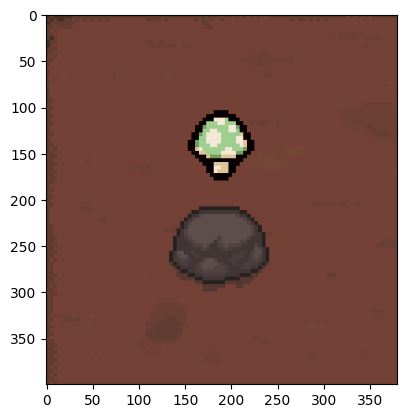

In [6]:
img = Image.open("/home/mizunno/Projects/TBOI_item_detector/data/derived_data/items_with_floor/1_1up!.png")
img_arr = np.array(img)
plt.imshow(img_arr)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

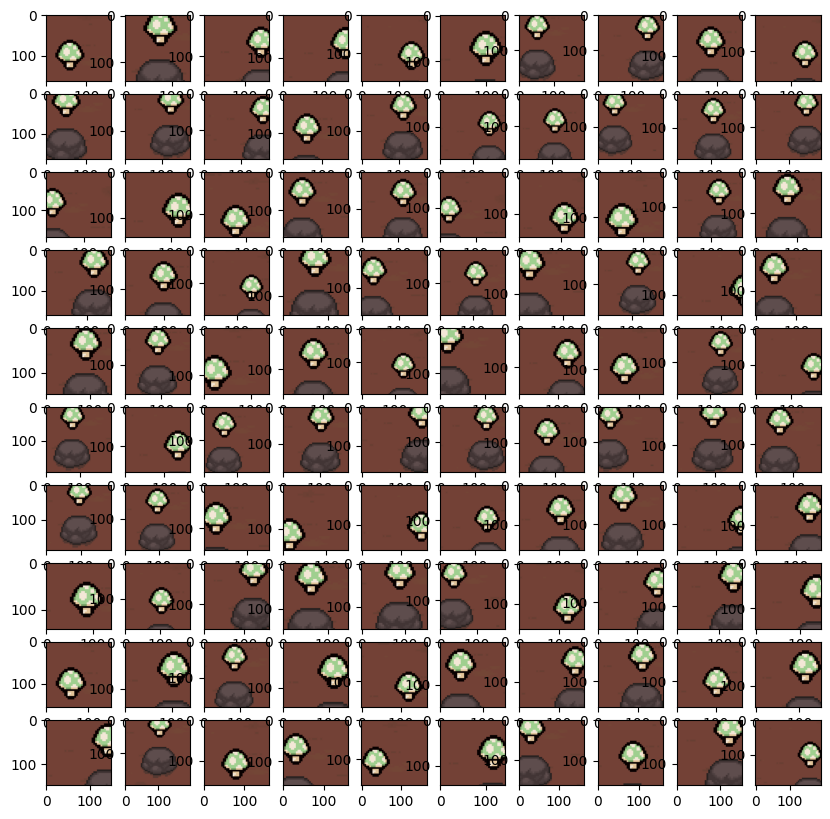

In [41]:
plt.figure(figsize=(10, 10))
for i in range(100):
    x, y = random.randint(25,175), random.randint(25,125)
    ex = random.randint(140, 200)
    img_augmented = tf.image.crop_to_bounding_box(img_arr, y, x, ex, ex)
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(Image.fromarray(img_augmented.numpy().astype(np.uint8), "RGB"))
plt.show()